In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import overpass
import seaborn as sns

In [3]:
train = pd.read_csv("train.csv")

In [4]:
print(train.shape)

(398648, 5)


In [5]:
print(train.dtypes)

waktu_setempat       object
id_jalan              int64
id_titik_mulai        int64
id_titik_akhir        int64
rerata_kecepatan    float64
dtype: object


In [6]:
print(train["id_jalan"].value_counts())

id_jalan
4061596      25467
3691841      24280
50841260     23187
26785612     22854
691007296    21847
142479648    20836
4060819      19979
1210         19888
66924592     19813
4004732      19592
8504977      18978
24704286     18655
182210371    18534
22932408     18225
47010584     18186
3688059      18186
4898588      17819
40044423     17755
150783571    17297
97453767     17270
Name: count, dtype: int64


In [7]:
train[train["id_titik_mulai"] == train["id_titik_akhir"]]

,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan


In [8]:
id_jalan = train["id_jalan"].unique()

In [9]:
print(id_jalan)

[691007296  47010584  22932408 142479648   8504977  50841260   4060819
  24704286   4061596   4004732   3688059  66924592   3691841  97453767
   4898588  26785612 182210371 150783571  40044423      1210]


In [10]:
# Convert to datetime dtype
train['waktu_setempat'] = pd.to_datetime(train['waktu_setempat'])

# Extract information
train['Date'] = train['waktu_setempat'].dt.day
train['Hour'] = train['waktu_setempat'].dt.hour

# Drop the original 'waktu_setempat'
train = train.drop('waktu_setempat', axis=1)


In [11]:
print(train["Hour"].value_counts())

Hour
20    19908
19    19804
23    19569
21    19490
22    19309
18    18848
10    18209
17    17835
0     17758
9     17675
11    17082
8     16862
16    16707
14    16426
13    16385
15    16242
12    15879
2     15827
7     15091
1     14274
3     13372
6     13371
4     11604
5     11121
Name: count, dtype: int64


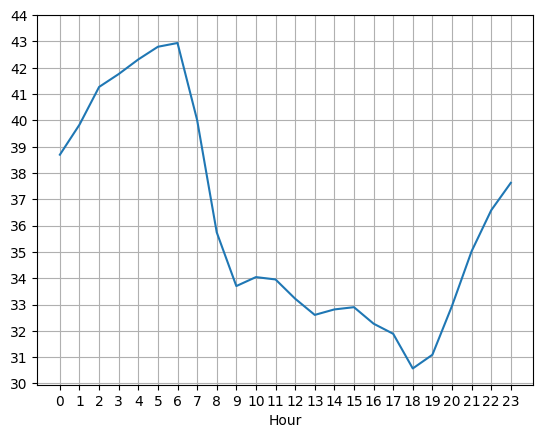

In [12]:
train.groupby("Hour").mean()["rerata_kecepatan"].plot()

# Set the x-axis ticks interval to 2
plt.xticks(range(0, 24, 1))
plt.yticks(range(30, 45, 1))
plt.grid()

In [13]:
dummy = train.head(10).copy()

In [14]:
print(dummy)

    id_jalan  id_titik_mulai  id_titik_akhir  rerata_kecepatan  Date  Hour
0  691007296        21390008      1425033102            29.126     1     1
1   47010584      1677092762       579493410            46.576     1     1
2   22932408        26486694      1930267566            36.587     1     1
3  142479648      1111592522      3775231113            34.063     1     1
4    8504977      5940503398      5940503394            38.336     1     1
5   50841260      5224440152      5224440151            42.309     1     1
6    4060819        21539432          227756            37.548     1     1
7  691007296        43405913        27242603            36.128     1     1
8   24704286      6343348893      5827426460            33.659     1     1
9    8504977      1623681994         2378872            44.421     1     1


In [15]:
jalan = []

In [20]:
print(train)

         id_jalan  id_titik_mulai  id_titik_akhir  rerata_kecepatan  Date  \
0       691007296        21390008      1425033102            29.126     1   
1        47010584      1677092762       579493410            46.576     1   
2        22932408        26486694      1930267566            36.587     1   
3       142479648      1111592522      3775231113            34.063     1   
4         8504977      5940503398      5940503394            38.336     1   
...           ...             ...             ...               ...   ...   
398643    3691841        18235127      1590448416            41.094    22   
398644    3691841      1250564256        18293380            45.902    22   
398645  182210371        33139383        33139375            38.918    22   
398646    8504977      1623682036        26467191            34.951    22   
398647  150783571       290025573       873734149            40.949    22   

        Hour  
0          1  
1          1  
2          1  
3          1  


In [16]:
import requests
from bs4 import BeautifulSoup

def scrape_bdi_content(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    bdi_tag = soup.find('bdi')
    if bdi_tag:
        bdi_content = bdi_tag.get_text()
        return bdi_content
    else:
        return None

def scrape_road_type(row):
    id = row['id_jalan']
    url = f'https://www.openstreetmap.org/way/{id}'
    bdi_content = scrape_bdi_content(url)

    if bdi_content:
        jalan.append(bdi_content)
        tipe = bdi_content.split()[-1]
        return tipe
    else:
        return None

In [ ]:
print(jalan)

[]


In [21]:
id_jalan = train["id_jalan"].unique()

id_jalan_to_road_type_map = {id_: scrape_road_type({'id_jalan': id_}) for id_ in id_jalan}

print(id_jalan_to_road_type_map)


In [136]:
print(id_jalan_to_road_type_map)

{691007296: 'Road', 47010584: 'Road', 22932408: 'Lane', 142479648: 'Hill', 8504977: 'Road', 50841260: 'Road', 4060819: 'Lane', 24704286: 'Road', 4061596: 'Avenue', 4004732: 'West', 3688059: 'Lane', 66924592: 'Road', 3691841: 'Road', 97453767: 'Road', 4898588: 'Hill', 26785612: 'Street', 182210371: 'Side', 150783571: 'Hill', 40044423: 'Road', 1210: 'Road'}


In [137]:
# Create the new column by mapping the values from "id_jalan" to road types using the dictionary
train["road_type"] = train["id_jalan"].map(id_jalan_to_road_type_map)

# Print the DataFrame to check the new column
print(train)


         id_jalan  id_titik_mulai  id_titik_akhir  rerata_kecepatan  Date  \
0       691007296        21390008      1425033102            29.126     1   
1        47010584      1677092762       579493410            46.576     1   
2        22932408        26486694      1930267566            36.587     1   
3       142479648      1111592522      3775231113            34.063     1   
4         8504977      5940503398      5940503394            38.336     1   
...           ...             ...             ...               ...   ...   
398643    3691841        18235127      1590448416            41.094    22   
398644    3691841      1250564256        18293380            45.902    22   
398645  182210371        33139383        33139375            38.918    22   
398646    8504977      1623682036        26467191            34.951    22   
398647  150783571       290025573       873734149            40.949    22   

        Hour road_type  
0          1      Road  
1          1      Road  


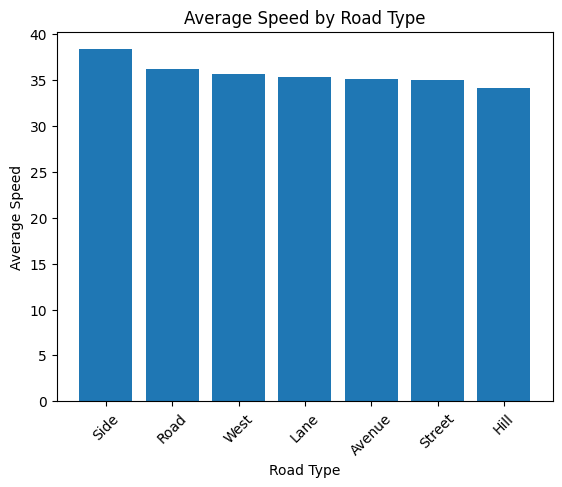

In [138]:
# Group the data by the "id_jalan_to_road_type_map" column and calculate the mean of "rerata_kecepatan"
grouped_data = train.groupby("road_type")["rerata_kecepatan"].mean()

grouped_data = grouped_data.sort_values(ascending=False)


# Create a bar plot
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel("Road Type")
plt.ylabel("Average Speed")
plt.title("Average Speed by Road Type")
plt.xticks(rotation=45)
plt.show()

In [139]:
def scrape_summary_content(url, keyword):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    td_tags = soup.find_all('summary')
    
    for td_tag in td_tags:
        if keyword in td_tag.text:
            return td_tag.get_text()
    
    return None

def scrape_ways(row):
    id_ = row['id_titik_mulai']
    url = f'https://www.openstreetmap.org/node/{id_}'
    content = scrape_summary_content(url, 'ways')

    if content:
        return content
    else:
        return None


In [140]:
id_node_awal = train["id_titik_mulai"].unique()

id_node_to_ways_awal = {id_: scrape_ways({'id_titik_mulai': id_}) for id_ in id_node_awal}



In [141]:
print(id_node_to_ways_awal)

{21390008: '3 ways', 1677092762: '3 ways', 26486694: '3 ways', 1111592522: '2 ways', 5940503398: '2 ways', 5224440152: '4 ways', 21539432: '3 ways', 43405913: '2 ways', 6343348893: '2 ways', 1623681994: '2 ways', 227757: '2 ways', 21504099: '3 ways', 32046542: '3 ways', 196051: '2 ways', 2951577723: '2 ways', 111950921: '2 ways', 26346792: '2 ways', 17899276: '2 ways', 33203760: '2 ways', 267341420: '3 ways', 17899643: '2 ways', 196049: '2 ways', 902515655: '2 ways', 301780: '2 ways', 30427336: '3 ways', 299294: '4 ways', 1697599345: '2 ways', 265111477: '2 ways', 6012998332: '2 ways', 20961139: '3 ways', 6285304942: '2 ways', 5425603383: '2 ways', 997589776: '4 ways', 111951162: '3 ways', 26480628: '2 ways', 2378878: '4 ways', 110268008: '2 ways', 43406731: '2 ways', 11079518: '2 ways', 902515739: '2 ways', 6012810682: '2 ways', 196038: '2 ways', 33776703: None, 110287458: '2 ways', 106201: '4 ways', 43405338: '3 ways', 620872375: '2 ways', 1167800139: '2 ways', 33228925: '2 ways', 27

In [142]:
# Create the new column by mapping the values from "id_jalan" to road types using the dictionary
train["node_awal_ways"] = train["id_titik_mulai"].map(id_node_to_ways_awal)



In [143]:
id_node_akhir = train["id_titik_akhir"].unique()

id_node_to_ways_akhir = {id_: scrape_ways({'id_titik_mulai': id_}) for id_ in id_node_akhir}



In [144]:
print(id_node_to_ways_akhir)

{1425033102: '3 ways', 579493410: '2 ways', 1930267566: '2 ways', 3775231113: '2 ways', 5940503394: '2 ways', 5224440151: '4 ways', 227756: '3 ways', 27242603: '3 ways', 5827426460: '2 ways', 2378872: '3 ways', 114276599: '2 ways', 1237102032: '2 ways', 32046623: '3 ways', 902515655: '2 ways', 25631788: '2 ways', 111951162: '3 ways', 292139: '4 ways', 18292997: '2 ways', 18126978: '3 ways', 33776308: '2 ways', 6285304942: '2 ways', 1030634577: '2 ways', 196051: '2 ways', 18235087: '3 ways', 18239812: '2 ways', 4731051219: '2 ways', 294158420: '2 ways', 6012998323: '2 ways', 18127003: '2 ways', 17899643: '2 ways', 1314925464: '2 ways', 111950921: '2 ways', 114254937: '2 ways', 3942057971: '2 ways', 301778: '2 ways', 4712485405: None, 4718334240: '2 ways', 21390004: '2 ways', 6012812394: '2 ways', 1677107122: '2 ways', 33776696: '2 ways', 33213210: '3 ways', 293813425: None, 620872402: None, 948926114: '2 ways', 3037670502: '2 ways', 1663475339: '2 ways', 21511949: '2 ways', 57311992: '3

In [145]:
# Create the new column by mapping the values from "id_jalan" to road types using the dictionary
train["node_akhir_ways"] = train["id_titik_akhir"].map(id_node_to_ways_akhir)



In [146]:
def scrape_summary_content(url, keyword):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    td_tags = soup.find_all('summary')
    
    for td_tag in td_tags:
        if keyword in td_tag.text:
            return td_tag.get_text()
    
    return None

def scrape_relation(row):
    id_ = row['id_jalan']
    url = f'https://www.openstreetmap.org/way/{id_}'
    content = scrape_summary_content(url, 'relations')

    if content:
        return content
    else:
        return None


In [147]:
id_jalan = train["id_jalan"].unique()

id_jalan_to_relation = {id_: scrape_relation({'id_jalan': id_}) for id_ in id_jalan}



In [148]:
print(id_jalan_to_relation)

{691007296: '13 relations', 47010584: '10 relations', 22932408: '4 relations', 142479648: '11 relations', 8504977: '4 relations', 50841260: '8 relations', 4060819: '11 relations', 24704286: '13 relations', 4061596: '8 relations', 4004732: '9 relations', 3688059: '13 relations', 66924592: '25 relations', 3691841: '8 relations', 97453767: '6 relations', 4898588: '10 relations', 26785612: '3 relations', 182210371: '13 relations', 150783571: '28 relations', 40044423: '8 relations', 1210: '16 relations'}


In [149]:
# Create the new column by mapping the values from "id_jalan" to road types using the dictionary
train["road_relation"] = train["id_jalan"].map(id_jalan_to_relation)

# Print the DataFrame to check the new column
print(train)


         id_jalan  id_titik_mulai  id_titik_akhir  rerata_kecepatan  Date  \
0       691007296        21390008      1425033102            29.126     1   
1        47010584      1677092762       579493410            46.576     1   
2        22932408        26486694      1930267566            36.587     1   
3       142479648      1111592522      3775231113            34.063     1   
4         8504977      5940503398      5940503394            38.336     1   
...           ...             ...             ...               ...   ...   
398643    3691841        18235127      1590448416            41.094    22   
398644    3691841      1250564256        18293380            45.902    22   
398645  182210371        33139383        33139375            38.918    22   
398646    8504977      1623682036        26467191            34.951    22   
398647  150783571       290025573       873734149            40.949    22   

        Hour road_type node_awal_ways node_akhir_ways road_relation  
0    

In [150]:
def scrape_summary_content(url, keyword):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    td_tags = soup.find_all('summary')
    
    for td_tag in td_tags:
        if keyword in td_tag.text:
            return td_tag.get_text()
    
    return None

def scrape_node(row):
    id_ = row['id_jalan']
    url = f'https://www.openstreetmap.org/way/{id_}'
    content = scrape_summary_content(url, 'nodes')

    if content:
        return content
    else:
        return None


In [151]:
id_jalan = train["id_jalan"].unique()

id_jalan_to_node = {id_: scrape_node({'id_jalan': id_}) for id_ in id_jalan}



In [152]:
print(id_jalan_to_node)

{691007296: '5 nodes', 47010584: '53 nodes', 22932408: '62 nodes', 142479648: '12 nodes', 8504977: '3 nodes', 50841260: '61 nodes', 4060819: '18 nodes', 24704286: '6 nodes', 4061596: '21 nodes', 4004732: '7 nodes', 3688059: '4 nodes', 66924592: '34 nodes', 3691841: '29 nodes', 97453767: '18 nodes', 4898588: '72 nodes', 26785612: '11 nodes', 182210371: '11 nodes', 150783571: '33 nodes', 40044423: '3 nodes', 1210: '40 nodes'}


In [153]:
# Create the new column by mapping the values from "id_jalan" to road types using the dictionary
train["road_node"] = train["id_jalan"].map(id_jalan_to_node)

# Print the DataFrame to check the new column
print(train)


         id_jalan  id_titik_mulai  id_titik_akhir  rerata_kecepatan  Date  \
0       691007296        21390008      1425033102            29.126     1   
1        47010584      1677092762       579493410            46.576     1   
2        22932408        26486694      1930267566            36.587     1   
3       142479648      1111592522      3775231113            34.063     1   
4         8504977      5940503398      5940503394            38.336     1   
...           ...             ...             ...               ...   ...   
398643    3691841        18235127      1590448416            41.094    22   
398644    3691841      1250564256        18293380            45.902    22   
398645  182210371        33139383        33139375            38.918    22   
398646    8504977      1623682036        26467191            34.951    22   
398647  150783571       290025573       873734149            40.949    22   

        Hour road_type node_awal_ways node_akhir_ways road_relation road_no

In [154]:
def scrape_td_content(url, keyword):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    td_tags = soup.find_all('td', class_='browse-tag-v')
    
    for td_tag in td_tags:
        if keyword in td_tag.text:
            return td_tag.get_text()
    
    return None

def scrape_road_type_max_speed(row):
    id_ = row['id_jalan']
    url = f'https://www.openstreetmap.org/way/{id_}'
    content = scrape_td_content(url, 'mph')

    if content:
        return content
    else:
        return None


In [155]:
id_jalan = train["id_jalan"].unique()

id_jalan_to_maxspeed = {id_: scrape_road_type_max_speed({'id_jalan': id_}) for id_ in id_jalan}



In [156]:
print()

In [157]:
# Create the new column by mapping the values from "id_jalan" to road types using the dictionary
train["max_speed"] = train["id_jalan"].map(id_jalan_to_maxspeed)

# Print the DataFrame to check the new column
print(train)


         id_jalan  id_titik_mulai  id_titik_akhir  rerata_kecepatan  Date  \
0       691007296        21390008      1425033102            29.126     1   
1        47010584      1677092762       579493410            46.576     1   
2        22932408        26486694      1930267566            36.587     1   
3       142479648      1111592522      3775231113            34.063     1   
4         8504977      5940503398      5940503394            38.336     1   
...           ...             ...             ...               ...   ...   
398643    3691841        18235127      1590448416            41.094    22   
398644    3691841      1250564256        18293380            45.902    22   
398645  182210371        33139383        33139375            38.918    22   
398646    8504977      1623682036        26467191            34.951    22   
398647  150783571       290025573       873734149            40.949    22   

        Hour road_type node_awal_ways node_akhir_ways road_relation road_no

In [158]:
print(train.dtypes)

id_jalan              int64
id_titik_mulai        int64
id_titik_akhir        int64
rerata_kecepatan    float64
Date                  int32
Hour                  int32
road_type            object
node_awal_ways       object
node_akhir_ways      object
road_relation        object
road_node            object
max_speed            object
dtype: object


In [159]:
import requests
from bs4 import BeautifulSoup
import re


def scrape_highway_description(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all anchor tags (a tags) with a title attribute that starts with the desired text
    pattern = re.compile(r'^The wiki description page for the highway=')
    anchor_tags = soup.find_all('a', title=pattern)

    # Check if any anchor tags were found
    if anchor_tags:
        # Extract the "secondary" element
        secondary_element = anchor_tags[0].text
        return secondary_element
    else:
        return None

def scrape_highway(row):
    id_ = row['id_jalan']
    url = f'https://www.openstreetmap.org/way/{id_}'
    content = scrape_highway_description(url)

    if content:
        return content
    else:
        return None


In [160]:
id_jalan = train["id_jalan"].unique()

id_jalan_to_type_highway = {id_: scrape_highway({'id_jalan': id_}) for id_ in id_jalan}



In [161]:
print(id_jalan_to_type_highway)

{691007296: 'trunk', 47010584: 'primary', 22932408: 'secondary', 142479648: 'primary', 8504977: 'primary', 50841260: 'primary', 4060819: 'primary', 24704286: 'primary', 4061596: 'secondary', 4004732: 'trunk', 3688059: 'trunk', 66924592: 'trunk', 3691841: 'trunk', 97453767: 'secondary', 4898588: 'primary', 26785612: 'primary', 182210371: 'trunk', 150783571: 'trunk', 40044423: 'trunk', 1210: 'primary'}


In [162]:
# Create the new column by mapping the values from "id_jalan" to road types using the dictionary
train["type_highway"] = train["id_jalan"].map(id_jalan_to_type_highway)

# Print the DataFrame to check the new column
print(train)


         id_jalan  id_titik_mulai  id_titik_akhir  rerata_kecepatan  Date  \
0       691007296        21390008      1425033102            29.126     1   
1        47010584      1677092762       579493410            46.576     1   
2        22932408        26486694      1930267566            36.587     1   
3       142479648      1111592522      3775231113            34.063     1   
4         8504977      5940503398      5940503394            38.336     1   
...           ...             ...             ...               ...   ...   
398643    3691841        18235127      1590448416            41.094    22   
398644    3691841      1250564256        18293380            45.902    22   
398645  182210371        33139383        33139375            38.918    22   
398646    8504977      1623682036        26467191            34.951    22   
398647  150783571       290025573       873734149            40.949    22   

        Hour road_type node_awal_ways node_akhir_ways road_relation road_no

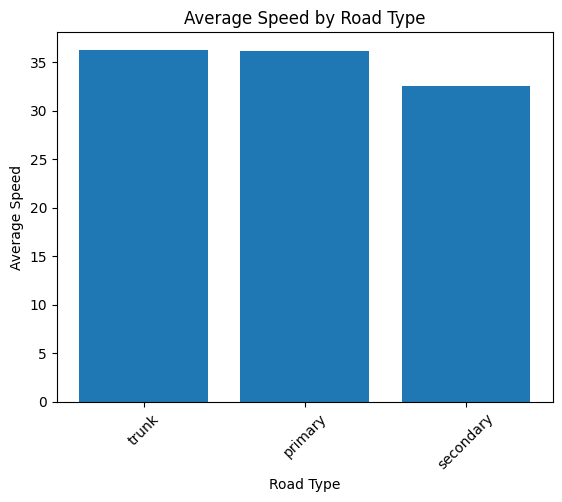

In [163]:
# Group the data by the "id_jalan_to_road_type_map" column and calculate the mean of "rerata_kecepatan"
grouped_data = train.groupby("type_highway")["rerata_kecepatan"].mean()

grouped_data = grouped_data.sort_values(ascending=False)


# Create a bar plot
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel("Road Type")
plt.ylabel("Average Speed")
plt.title("Average Speed by Road Type")
plt.xticks(rotation=45)
plt.show()

In [164]:
train.to_csv("data_jalan_1.csv", index=False)

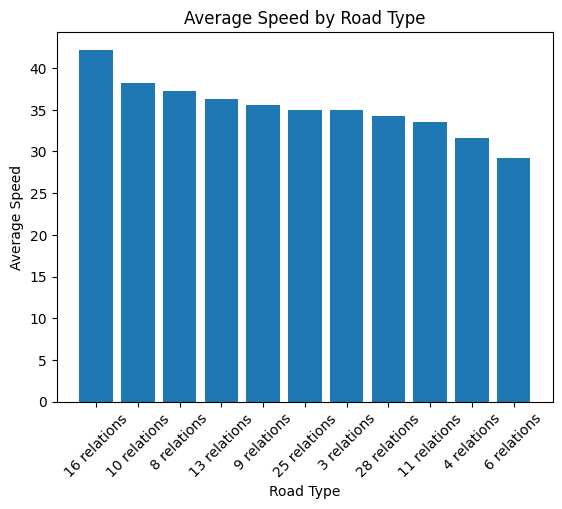

In [165]:
# Group the data by the "id_jalan_to_road_type_map" column and calculate the mean of "rerata_kecepatan"
grouped_data = train.groupby("road_relation")["rerata_kecepatan"].mean()

grouped_data = grouped_data.sort_values(ascending=False)


# Create a bar plot
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel("Road Type")
plt.ylabel("Average Speed")
plt.title("Average Speed by Road Type")
plt.xticks(rotation=45)
plt.show()

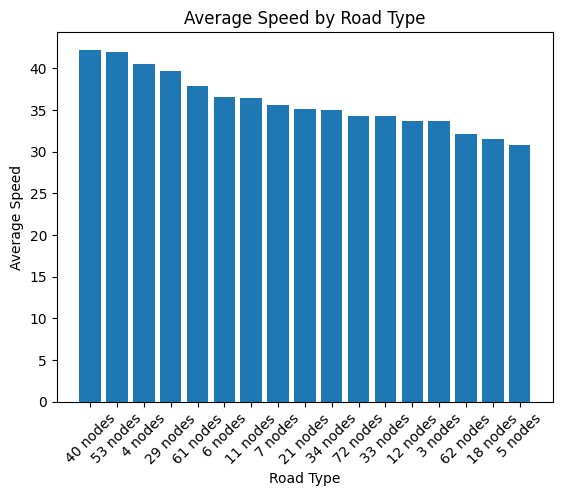

In [166]:
# Group the data by the "id_jalan_to_road_type_map" column and calculate the mean of "rerata_kecepatan"
grouped_data = train.groupby("road_node")["rerata_kecepatan"].mean()

grouped_data = grouped_data.sort_values(ascending=False)


# Create a bar plot
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel("Road Type")
plt.ylabel("Average Speed")
plt.title("Average Speed by Road Type")
plt.xticks(rotation=45)
plt.show()

In [167]:
print(train)

         id_jalan  id_titik_mulai  id_titik_akhir  rerata_kecepatan  Date  \
0       691007296        21390008      1425033102            29.126     1   
1        47010584      1677092762       579493410            46.576     1   
2        22932408        26486694      1930267566            36.587     1   
3       142479648      1111592522      3775231113            34.063     1   
4         8504977      5940503398      5940503394            38.336     1   
...           ...             ...             ...               ...   ...   
398643    3691841        18235127      1590448416            41.094    22   
398644    3691841      1250564256        18293380            45.902    22   
398645  182210371        33139383        33139375            38.918    22   
398646    8504977      1623682036        26467191            34.951    22   
398647  150783571       290025573       873734149            40.949    22   

        Hour road_type node_awal_ways node_akhir_ways road_relation road_no

In [168]:
print(train.dtypes)
col = ["road_type","node_awal_ways","node_akhir_ways","road_relation","road_node","max_speed"]
for z in col:
     train[z] = train[z].str.split().str[0]


id_jalan              int64
id_titik_mulai        int64
id_titik_akhir        int64
rerata_kecepatan    float64
Date                  int32
Hour                  int32
road_type            object
node_awal_ways       object
node_akhir_ways      object
road_relation        object
road_node            object
max_speed            object
type_highway         object
dtype: object


In [169]:
print(train.dtypes)

id_jalan              int64
id_titik_mulai        int64
id_titik_akhir        int64
rerata_kecepatan    float64
Date                  int32
Hour                  int32
road_type            object
node_awal_ways       object
node_akhir_ways      object
road_relation        object
road_node            object
max_speed            object
type_highway         object
dtype: object


In [170]:
cat = ["id_jalan","id_titik_mulai","id_titik_akhir","road_type","type_highway","max_speed"]
train[cat] = train[cat].apply(lambda x: pd.Categorical(x))

In [171]:
angka = ["road_relation","road_node"]

for z in angka:
    print(train[z].isna().sum())

0
0


In [172]:
train[angka] = train[angka].astype("int")

In [175]:
train.to_csv("baseline_data.csv", index=False)

In [96]:
print(train.head())

    id_jalan id_titik_mulai id_titik_akhir  rerata_kecepatan  Date  Hour  \
0  691007296       21390008     1425033102            29.126     1     1   
1   47010584     1677092762      579493410            46.576     1     1   
2   22932408       26486694     1930267566            36.587     1     1   
3  142479648     1111592522     3775231113            34.063     1     1   
4    8504977     5940503398     5940503394            38.336     1     1   

  road_type  node_awal_ways  node_akhir_ways  road_relation  road_node  \
0      Road               3                3             13          5   
1      Road               3                2             10         53   
2      Lane               3                2              4         62   
3      Hill               2                2             11         12   
4      Road               2                2              4          3   

  max_speed type_highway  
0        30        trunk  
1        30      primary  
2        20    se

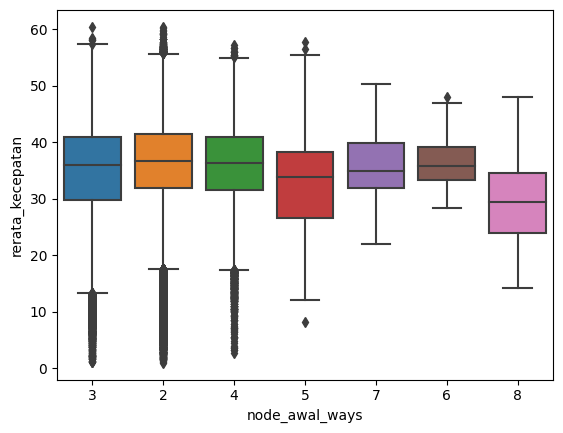

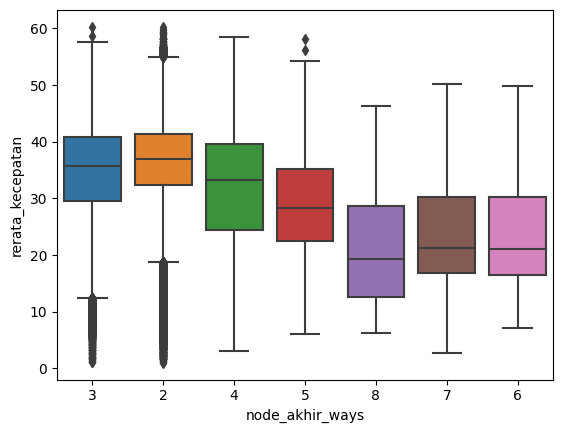

In [174]:
sns.boxplot(data = train,x = "node_awal_ways",y = "rerata_kecepatan")
plt.show()
sns.boxplot(data = train,x = "node_akhir_ways",y = "rerata_kecepatan")
plt.show()

In [97]:
train["nodeawal+akhir"] = train["node_awal_ways"] + train["node_akhir_ways"]


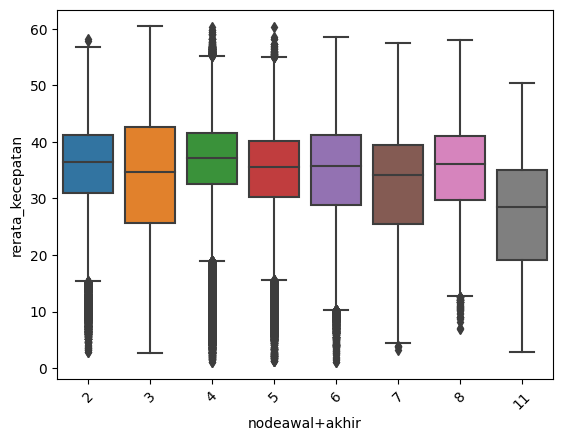

In [98]:
sns.boxplot(data = train,x = "nodeawal+akhir",y = "rerata_kecepatan")
plt.xticks(rotation=45)  # Rotates the x-axis tick labels by 45 degrees
plt.show()

In [100]:
print(train.dtypes)

id_jalan            category
id_titik_mulai      category
id_titik_akhir      category
rerata_kecepatan     float64
Date                   int32
Hour                   int32
road_type           category
node_awal_ways         int32
node_akhir_ways        int32
road_relation          int32
road_node              int32
max_speed           category
type_highway        category
nodeawal+akhir         int32
dtype: object
